In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
train_original = pd.read_csv("MBenz train.csv")
test_original = pd.read_csv("Mbenz test.csv")

In [3]:
train_original.drop("ID",inplace=True,axis=1)
test_original.drop("ID",inplace=True,axis=1)

# EDA

In [4]:
train_original.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_original.shape

(4209, 377)

In [6]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


# Null Values and Uniques Values

In [49]:
# Check the null values in the train dataset
print('The sum of null values in the train dataset is:', train_original.isnull().any().sum())

The sum of null values in the train dataset is: 0


In [51]:
train_original.nunique()

y       2496
X0        47
X1        27
X2        43
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64

In [52]:
# Check the null values in the test dataset
print('The sum of null values in the train dataset is:', test_original.isnull().any().sum())

The sum of null values in the train dataset is: 0


In [53]:
test_original.nunique()

X0      49
X1      27
X2      45
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 364, dtype: int64

# Removing the column with zero variance

In [7]:
train_original.var()[train_original.var() == 0].index.values

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [8]:
threshold = 0.0
train_original.drop(train_original.var()[train_original.var() == threshold].index.values, axis=1,inplace=True)

In [9]:
train_original.shape

(4209, 365)

In [10]:
train_original.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_original.var()[test_original.var() == 0]

test_original.var()[test_original.var() == 0].index.values

array(['X257', 'X258', 'X295', 'X296', 'X369'], dtype=object)

In [12]:
# drop all the variance variable
#threshold = 0.0
#test_original.drop(test_original.var()[test_original.var() == threshold].index.values, axis=1,inplace=True)

test_original.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290','X293', 'X297', 'X330', 'X347'],axis=1,inplace=True)


In [13]:
test_original.shape

(4209, 364)

In [14]:
# all the integer datatype in data_num
data_num=train_original.select_dtypes(include=["int64"])

In [15]:
# all the categorical vaiables are in data_cat 
data_cat=train_original.select_dtypes(include=["object"])

In [16]:
data_cat

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [17]:
data_num

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='y'>

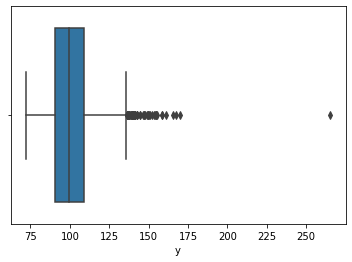

In [18]:
sns.boxplot(train_original.y)

In [19]:
# Outlier Detection


def outlier_detection(data_column):
    sorted(data_column)
    Q1, Q3=np.percentile(data_column,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    
    return lower_range, upper_range

In [20]:
l,u = outlier_detection(train_original.y)

In [21]:
print("Lower acceptable range value is ", l)
print("Upper acceptable range value is ", u)

Lower acceptable range value is  63.534999999999975
Upper acceptable range value is  136.29500000000002


In [22]:
train_original.drop(train_original[(train_original.y<l)|(train_original.y>u)].index, inplace=True)

<AxesSubplot:xlabel='y'>

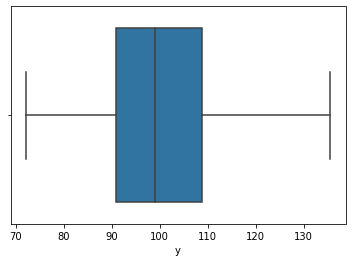

In [23]:
sns.boxplot(train_original.y)

In [24]:
# all the object variables
train_original.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4159,4159,4159,4159,4159,4159,4159,4159
unique,47,27,43,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,359,826,1637,1906,4155,230,1030,272


In [25]:
# show all the object variables names
label_columns= train_original.describe(include=["object"]).columns.values
label_columns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [26]:
#now create a Label Encoder and for columns identified in obj_col and apply Label Encoder to convert them
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
obj_cols = train_original.describe(include='object').T.index.values
for i in obj_cols:
  le.fit(train_original[i].append(test_original[i]).values) # appending test values for same level of encoding
  train_original[i] = le.transform(train_original[i])
  test_original[i] = le.transform(test_original[i])

In [28]:
#import train_test_split 
from sklearn.model_selection import train_test_split

In [29]:
#y is a target feature so we drop this from features columns
x=train_original.drop("y",axis=1)

In [30]:
y=train_original[["y"]]

In [31]:
#split the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.2)

In [32]:
x_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2512,19,8,4,2,3,20,10,23,0,0,...,0,0,1,0,0,0,0,0,0,0
3083,36,10,18,2,3,23,11,13,0,0,...,0,0,1,0,0,0,0,0,0,0
3537,50,1,18,6,3,24,3,9,0,0,...,1,0,0,0,0,0,0,0,0,0
2258,36,1,16,2,3,17,11,17,0,0,...,0,0,1,0,0,0,0,0,0,0
777,9,9,18,5,3,6,3,17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
x_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
266,24,23,18,5,3,15,6,13,0,0,...,0,0,0,1,0,0,0,0,0,0
224,51,0,4,5,3,15,6,24,0,0,...,0,0,0,0,0,0,0,0,0,0
750,36,1,4,2,3,6,8,22,0,0,...,1,0,0,0,0,0,0,0,0,0
233,23,3,10,2,3,15,0,22,0,0,...,0,0,1,0,0,0,0,0,0,0
3082,51,3,8,1,3,23,9,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.decomposition import PCA


In [35]:
pca=PCA(0.98,svd_solver="full")

In [36]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [37]:
pca.n_components_

12

In [38]:
pca.explained_variance_ratio_

array([0.40812869, 0.21675781, 0.13167769, 0.10830784, 0.08194186,
       0.01415977, 0.0066444 , 0.00384561, 0.00261048, 0.00213223,
       0.00209689, 0.00181788])

In [39]:
pca_x_train= pd.DataFrame(pca.transform(x_train))
pca_x_test=pd.DataFrame(pca.transform(x_test))
test_df_data = pd.DataFrame(pca.transform(test_original))

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
model = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)
model.fit(pca_x_train,y_train)
xgpred=model.predict(pca_x_test)

[04:54:12] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
print("For XGBOOST ......")
print("The RMSE value is",np.sqrt(mean_squared_error(y_test,xgpred)))
print("r_square value is", r2_score(y_test,xgpred))

For XGBOOST ......
The RMSE value is 8.016500993524808
r_square value is 0.5497700474567198


In [43]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(pca_x_train,y_train)
print("For Random Forest Regressor -")
y_pred_rfr = rfr_model.predict(pca_x_test)

For Random Forest Regressor -


In [44]:
print("for Random Forest Regressor ........")
print("R2 Score =",r2_score(y_test,y_pred_rfr))
print("Root Mean Squared Error for Random Forest Regressor =",np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

for Random Forest Regressor ........
R2 Score = 0.5538556799469385
Root Mean Squared Error for Random Forest Regressor = 7.980045045562008


In [45]:
y_pred_test = model.predict(test_df_data) 
y_pred_test

array([ 79.33816,  93.50993,  81.16266, ...,  94.64775, 107.47105,
        95.71884], dtype=float32)

In [47]:
test_df_data['Predicted Time (in secs)'] = y_pred_test

In [48]:
test_df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Predicted Time (in secs)
0,16.259541,13.725269,13.958815,5.979066,10.708000,6.765134,-1.859976,2.340179,1.193802,-1.520588,1.252845,3.574976,79.338158
1,-15.795101,-8.545021,-7.258739,-2.637704,11.976086,0.913895,3.921956,1.924121,-0.485656,0.864569,0.237699,-0.161807,93.509933
2,12.419147,-3.224298,-11.898450,13.305241,-2.585353,-2.582251,-1.065960,0.463558,0.334482,-0.514175,0.878629,3.304074,81.162659
3,14.286466,14.280131,16.453081,-5.780079,2.299488,-3.929012,-2.830390,2.062308,-0.252530,-2.086068,1.207217,3.851271,76.262405
4,-12.305185,1.701985,18.477527,6.879707,-0.972297,-1.439152,0.913227,-3.097907,-1.445649,0.257538,-0.282147,0.239786,110.603783
